# Classification with Decision Trees and KNN on the Breast Cancer Wisconsin Dataset

## 1 - Imports

First, we import the necessary libraries. The pandas library will help us to handle our data.
The pyplot library will help us create graphs and visualizations.
And finally, numpy helps us to rearrange and perform calculations with arrays and matrices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2 - The Breast Cancer Wisconsin Dataset

The Breast Cancer Wisconsin dataset is a classic and very easy binary classification dataset. It consists of 569 instances of breast cancer. 212 of these instances are labelled as malignant (label 0) and 357 are labelled as benign (label 1).

The features in the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

FNA is a method to extract a small amount of tissue instead of an invasive surgical biopsy. Here is the process for an FNA:   
![FNA process](https://www.verywellhealth.com/thmb/U7vbgw4xDzcAaJqPBMHC6YlDwcg=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/VWH-EllenLindner-WhattoExpectDuringaFineNeedleAspiration-Standard-f3922b5388734f2b879d5a895a97c9fe.jpg)


Here are samples of the images made of the FNA samples:   
![Benign](https://static.hindawi.com/articles/abb/volume-2022/6187275/figures/6187275.fig.001.jpg)

![Malignant](https://static.hindawi.com/articles/abb/volume-2022/6187275/figures/6187275.fig.002.jpg)

To digitize the images, users first had to initialize the model by drawing approximate boundaries around the cell nucleus. The actual boundary is located by an active contour model, a so called [snake](https://en.wikipedia.org/wiki/Active_contour_model).


Ten real-valued characteristics/features were computed from these images. For the classification, we use only four of them:

1. radius (mean of distances from nucleus center to points on the perimeter)
2. concavity (severity of concave portions of the contour)
3. concave points (number of concave portions of the contour)
4. symmetry (In order to measure symmetry, the major axis, or longest chord through the center, is found. We then measure the length difference between lines perpendicular to the major axis to the cell boundary in both directions.)

The mean, standard error and "worst" or largest (mean of the three largest values) of these characteristics were computed for each image, resulting in 30 features.
For instance, field 0 is Mean Radius, field 11 is Radius Standard Error, field 21 is Worst Radius.

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer_DS = load_breast_cancer()

The type of the dataset is `sklearn.utils.Bunch` - a scikit-learn custom dictionary-like data structure with entries containing the:
* `data` - the 30 features for each of the 569 data points
* `feature_names` - the names of each of the 30 features
* `target` - the label (0 or 1) for each of the 569 data points
* `target_names` - the names associated with the labels 0-malignant, 1-benign
* `DESCR` - the metadata with description of the dataset

In [3]:
breast_cancer_DS.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### 2.1 - Exploring the Breast Cancer Wisconsin Dataset

In [4]:
print (breast_cancer_DS.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# Load all data points x[i]
X = breast_cancer_DS.data

# Load the target data y[i] (labels for each x[i])
y = breast_cancer_DS.target # 0 - malignant, 1 - benign

In [6]:
selected_features = ["worst concave points", "worst concavity", "worst radius", "mean symmetry", "worst symmetry"]
X = pd.DataFrame(X, columns=breast_cancer_DS['feature_names'])
X = X[selected_features]
#X = X.values.tolist()
X = X.to_numpy()

In [7]:
X.shape

(569, 5)

In [8]:
# Create a Pandas dataframe with the features and add a column with the corresponding labels
dataset = pd.DataFrame(X, columns=selected_features)

In [9]:
dataset.head(5)

,worst concave points,worst concavity,worst radius,mean symmetry,worst symmetry
0,0.2654,0.7119,25.38,0.2419,0.4601
1,0.1860,0.2416,24.99,0.1812,0.2750
2,0.2430,0.4504,23.57,0.2069,0.3613
3,0.2575,0.6869,14.91,0.2597,0.6638
4,0.1625,0.4000,22.54,0.1809,0.2364


In [10]:
dataset.describe()

,worst concave points,worst concavity,worst radius,mean symmetry,worst symmetry
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.114606,0.272188,16.269190,0.181162,0.290076
std,0.065732,0.208624,4.833242,0.027414,0.061867
min,0.000000,0.000000,7.930000,0.106000,0.156500
25%,0.064930,0.114500,13.010000,0.161900,0.250400
50%,0.099930,0.226700,14.970000,0.179200,0.282200
75%,0.161400,0.382900,18.790000,0.195700,0.317900
max,0.291000,1.252000,36.040000,0.304000,0.663800


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   worst concave points  569 non-null    float64
 1   worst concavity       569 non-null    float64
 2   worst radius          569 non-null    float64
 3   mean symmetry         569 non-null    float64
 4   worst symmetry        569 non-null    float64
dtypes: float64(5)
memory usage: 22.4 KB


In [12]:
dataset['is_benign'] = y.T
dataset.shape

(569, 6)

Here we can see how many benign

### 2.2 - Class distribution

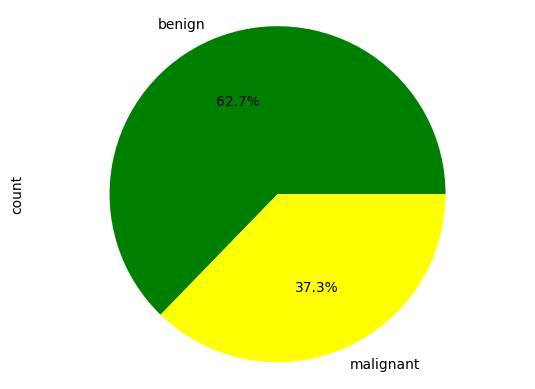

In [13]:
colors=['green','yellow']
dataset.is_benign.value_counts().plot(kind="pie",colors=colors,autopct='%1.1f%%', labels=["benign", "malignant"])
plt.axis("equal")
plt.show()

After exploring the class distribution in the dataset it is obvious that there are more datapoint labeled as "benign". This is a so called **Majority Class**. Namely, a "stupid" classifier that always predicts 1 will produce predictions with 63% accuracy (`count_benign / count_all`). Our classifier must perform better.

### 2.3 - Train-Test Split

We will now have to split the dataset into _training set_ and _test set_. The trainig set will be used to fit the model parameters. The data points in the test set will not be used for training the model. They will only be used for unbiased (objective) evaluation of the model(s). 

For this purpose we will be using:
* [`sklearn.preprocessing.scale`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) - for normalizing the data
* [`sklearn.model_selection.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) - for splitting the data into random train and test subsets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

## 3 - Decision Tree
### 3.1 - Import

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as sklearn_tree

In [16]:
X_part, X_test, y_part, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_part, y_part, stratify=y_part, test_size=0.2, random_state=1)

### 3.2 - Trying out different values of $max\_depth$

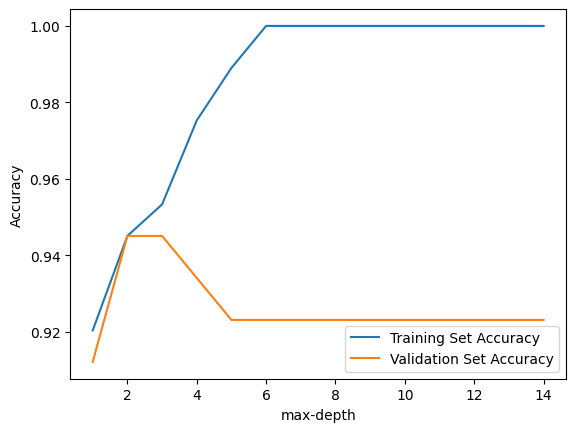

In [18]:
training_accuracy = []
val_accuracy = []

max_dep = range(1, 15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md, random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    val_accuracy.append(tree.score(X_val, y_val))
    
plt.plot(max_dep, training_accuracy, label='Training Set Accuracy')
plt.plot(max_dep, val_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('max_depth)
plt.legend()

By looking at plot, best results are obtained for `max_depth == 2`. It seems that the model doesn't overfit too much, even with more depth. This could be because we are only using five of the ten features of the data.
Other parameters that control the size of the tree and can provide better results are:
* `min_samples_leaf`- The minimum number of samples required to be at a leaf node
* `min_samples_split` - The minimum number of samples required to split an internal node:
* `max_leaf_nodes` - Grow a tree with max_leaf_nodes in best-first fashion.

### 3.3 - Calculate Accuracy of Test Set

In [19]:
# test
tree = DecisionTreeClassifier(max_depth=val_accuracy.index(max(val_accuracy)) + 1, random_state=0, criterion="entropy")
tree.fit(X_train, y_train)
test_accuracy = tree.score(X_train, y_train)

In [20]:
print('Accuracy on the test set for max_depth={0}: {1:.3f}'.format(val_accuracy.index(max(val_accuracy)) + 1,  test_accuracy))

Accuracy on the test set for max_depth=2: 0.945


### 3.4 - Visualizing the best Decision Tree

[Text(0.5, 0.8333333333333334, 'worst concave points <= 0.141\ngini = 0.468\nsamples = 364\nvalue = [136, 228]'),
 Text(0.25, 0.5, 'worst radius <= 16.83\ngini = 0.165\nsamples = 243\nvalue = [22, 221]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.053\nsamples = 220\nvalue = [6, 214]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.423\nsamples = 23\nvalue = [16, 7]'),
 Text(0.75, 0.5, 'worst radius <= 15.59\ngini = 0.109\nsamples = 121\nvalue = [114, 7]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.018\nsamples = 109\nvalue = [108, 1]')]

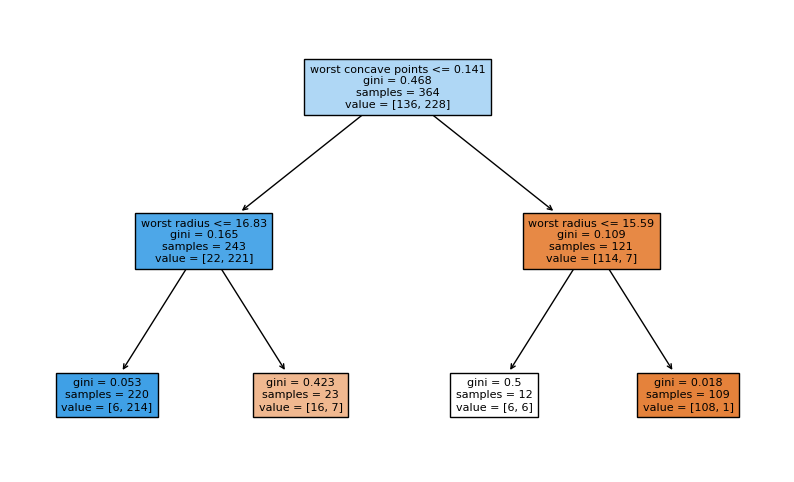

In [21]:
tree = DecisionTreeClassifier(max_depth=max_dep[val_accuracy.index(max(val_accuracy))], random_state=0)
clf = tree.fit(X_train, y_train)
plt.figure(figsize=(10,6))
sklearn_tree.plot_tree(tree, filled=True, fontsize=8, feature_names=list(dataset.columns), rounded=False)

The gini index is a measure of impurity, like entropy. Remember entropy?   
![Variation of Entropy against data points](https://d1rwhvwstyk9gu.cloudfront.net/2022/10/Entropy.png)   
![Entropy vs. Gini Index](https://ekamperi.github.io/images/decision_trees/gini_vs_entropy.png)

### 3.5 - Analyzing the Decision Tree

The importance for each of the 5 features of the dataset:

In [22]:
tree.feature_importances_

array([0.83108941, 0.        , 0.16891059, 0.        , 0.        ])

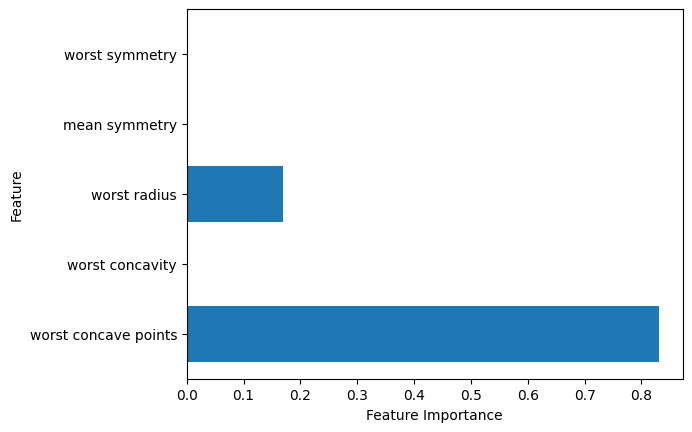

In [23]:
n_feature = len(selected_features)
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), selected_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### 3.6 - Predict

### 3.6.1 Class Malignant

Let's make a prediction for a single sample with the class malignant:

In [24]:
# Make a dataframe with one sample
single_sample_malignant = pd.DataFrame([X_test[4]], columns=selected_features)

In [25]:
single_sample_malignant

,worst concave points,worst concavity,worst radius,mean symmetry,worst symmetry
0,0.1445,0.3158,24.22,0.1467,0.2238


In [26]:
# print the class of the sample
# remember: 0 - malignant, 1 - benign
print(y_test[4])

0


In [27]:
# Let the tree make a prediction
print(tree.predict(single_sample_malignant))

[0]


C:\Users\noemi\.conda\envs\KI-Seminarkurs\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


The predicted class is 0! As is the original label of this sample. This means our best decision tree classified a sample it has not seen before correctly.

#### 3.6.2 Class Benign

Now let's make a prediction for a single sample with the class benign:

In [28]:
# Make a dataframe with one sample
single_sample_benign = pd.DataFrame([X_test[0]], columns=selected_features)

In [29]:
single_sample_benign

,worst concave points,worst concavity,worst radius,mean symmetry,worst symmetry
0,0.1284,0.1935,15.11,0.1714,0.2849


In [30]:
# print the class of the sample
# remember: 0 - malignant, 1 - benign
print(y_test[0])

1


In [31]:
# Let the tree make a prediction
print(tree.predict(single_sample_benign))

[1]


C:\Users\noemi\.conda\envs\KI-Seminarkurs\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Our classification tree again classifies a sample from the test set correctly as benign.

## 4 - KNN
### 4.1 - Import

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model = KNeighborsClassifier(n_neighbors=3)

In [34]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
model.score(X_test, y_test)

0.9473684210526315

### 4.2 - Trying out different values of $k$

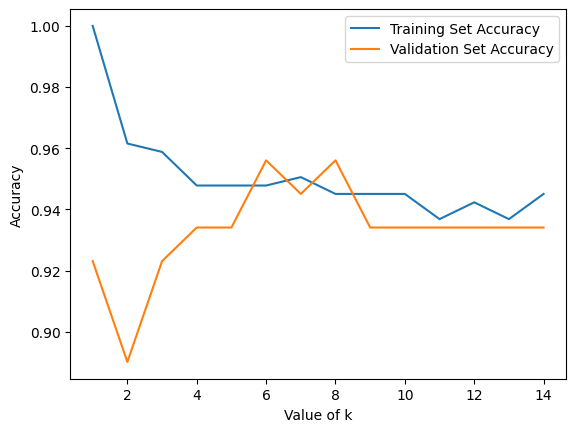

In [36]:
training_accuracy = []
val_accuracy = []

#try KNN for different values of k (1 to 15)
neighbors_setting = range(1, 15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    val_accuracy.append(knn.score(X_val, y_val))
 
plt.plot(neighbors_setting, training_accuracy, label='Training Set Accuracy')
plt.plot(neighbors_setting, val_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Value of k')
plt.legend()

In [37]:
print('Best accuracy on the validation set is for KNN={0}: {1:.3f}'.format(val_accuracy.index(max(val_accuracy)) + 1,  val_accuracy[val_accuracy.index(max(val_accuracy))]))

Best accuracy on the validation set is for KNN=6: 0.956


### 4.3 - Calculate Accuracy for Test Set

In [38]:
knn = KNeighborsClassifier(n_neighbors=val_accuracy.index(max(val_accuracy)) + 1)
knn.fit(X_train,y_train)
test_accuracy = knn.score(X_test, y_test)

In [39]:
print('Accuracy on the test set for KNN={0}: {1:.3f}'.format(val_accuracy.index(max(val_accuracy)) + 1,  test_accuracy))

Accuracy on the test set for KNN=6: 0.939


### 4.3 Predict samples

Let's predict the same two samples we tried with our best decision tree:

In [40]:
# Train best KNN model
knn = KNeighborsClassifier(n_neighbors=[*range(1, 15)][val_accuracy.index(max(val_accuracy))])
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

#### 4.3.1 Class Malignant

In [41]:
single_sample_malignant

,worst concave points,worst concavity,worst radius,mean symmetry,worst symmetry
0,0.1445,0.3158,24.22,0.1467,0.2238


In [42]:
knn.predict([X_test[4]])

array([0])

In [43]:
y_test[4]

0

Correct!

#### 4.3.2 Class Benign

In [44]:
single_sample_benign

,worst concave points,worst concavity,worst radius,mean symmetry,worst symmetry
0,0.1284,0.1935,15.11,0.1714,0.2849


In [45]:
knn.predict([X_test[0]])

array([1])

In [46]:
y_test[0]

1

Let's try to visualize the datapoints and the decision boundary of our model. As the data has five dimensions, we will only be visualizing two.

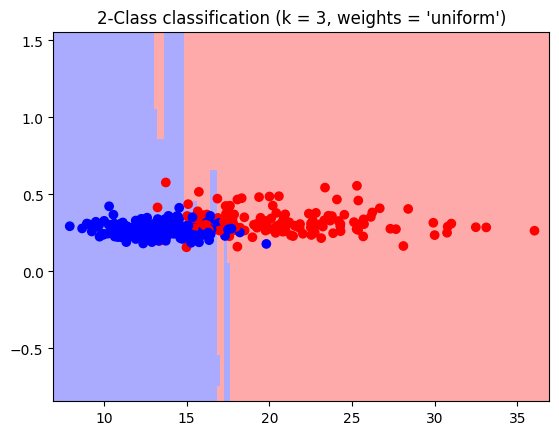

In [47]:
#import numpy as np
#import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#from sklearn import neighbors, datasets

n_neighbors = 3

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
X = X_train[:, 2:5:2]

#y = iris.target
y = y_train[:]

h = .2  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform']: #, 'distance'
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()